## 태양광 발전소
- 위치 : 발전소의 위치
- 일자
- 현재발전출력 : 해당 일자에 발전소가 생성한 전력의 양을 의미 , 일반적으로 킬로와트시(kWh) 또는 메가와트시(MWh)로 측정
- 수평일사량1 : 발전소 위치에서 수평면에 수직으로 입사하는 태양광의 양, 보통 일사량을 측정한 값으로 , 일반적으론 kW/m^2이다.
- 수평일사량2 :
- 경사일사량1 : 발전소에 설치된 경사진 면 (태양광 패널)의 일사량, 경사각에 따라 태양광의 입사량이 달라지기 때문에 수평 일사량과 다를 수 있습니다.
- 경사일사량2:
- 외기온도1 : 발전소 위치에서 측정된 외부 공기의 온도를 나타냄

In [ ]:
### 해당 월에 따른 수평,경사 일사량에 현재발전출력이 가장 좋게 나오는 각도? 

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings

df = pd.read_excel('Project_Data1.xlsx')
df.head()

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2
0,A,2019-01-01,110.657369,126.177314,154.397648,132.259603,160.382978,14.841146,15.428378
1,A,2019-01-02,328.857233,352.846093,372.683510,382.959001,406.382636,15.685417,14.837355
2,A,2019-01-03,344.740215,388.097375,424.301904,421.362986,459.246443,15.189286,16.407851
3,A,2019-01-04,359.595589,358.813102,383.930114,380.419512,407.340175,15.935537,16.102201
4,A,2019-01-05,358.737685,319.165867,355.007110,338.567568,379.146572,16.579135,16.859500


In [52]:
df.describe()

,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,월,연도
count,10950,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000
mean,2018-12-31 18:42:24.657534464,1524.820355,230.222646,179.333677,268.453154,206.059806,10.926778,10.705167,6.526027,2018.500000
min,2016-01-01 00:00:00,0.000000,0.003874,0.001222,0.026364,0.000000,-11.483838,-11.483838,1.000000,2016.000000
25%,2017-07-02 00:00:00,48.239667,92.511838,66.228846,124.028144,66.511936,4.566542,3.632296,4.000000,2017.000000
50%,2018-12-31 12:00:00,271.103925,210.744395,150.383368,250.280604,176.532612,9.972232,7.682633,7.000000,2018.500000
75%,2020-07-02 00:00:00,766.153642,344.877557,279.373709,398.176523,328.630104,16.236982,13.582874,10.000000,2020.000000
max,2021-12-31 00:00:00,15198.240234,657.568471,625.428754,712.759448,716.524755,33.379454,253.434425,12.000000,2021.000000
std,NaN,3061.868376,160.167291,133.628585,171.394361,157.573487,7.618199,18.351585,3.448009,1.707903


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   위치      10950 non-null  object        
 1   일자      10950 non-null  datetime64[ns]
 2   현재발전출력  10950 non-null  float64       
 3   수평일사량1  10950 non-null  float64       
 4   수평일사량2  10950 non-null  float64       
 5   경사일사량1  10950 non-null  float64       
 6   경사일사량2  10950 non-null  float64       
 7   외기온도1   10950 non-null  float64       
 8   외기온도2   10950 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 770.1+ KB


In [5]:
df.isnull().sum()

위치        0
일자        0
현재발전출력    0
수평일사량1    0
수평일사량2    0
경사일사량1    0
경사일사량2    0
외기온도1     0
외기온도2     0
dtype: int64

In [7]:
df['위치'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



X = df[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2']]
y = df['현재발전출력']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = RandomForestRegressor(random_state=0)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 8114129.632437381


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

ValueError: num must be an integer with 1 <= num <= 8, not 9

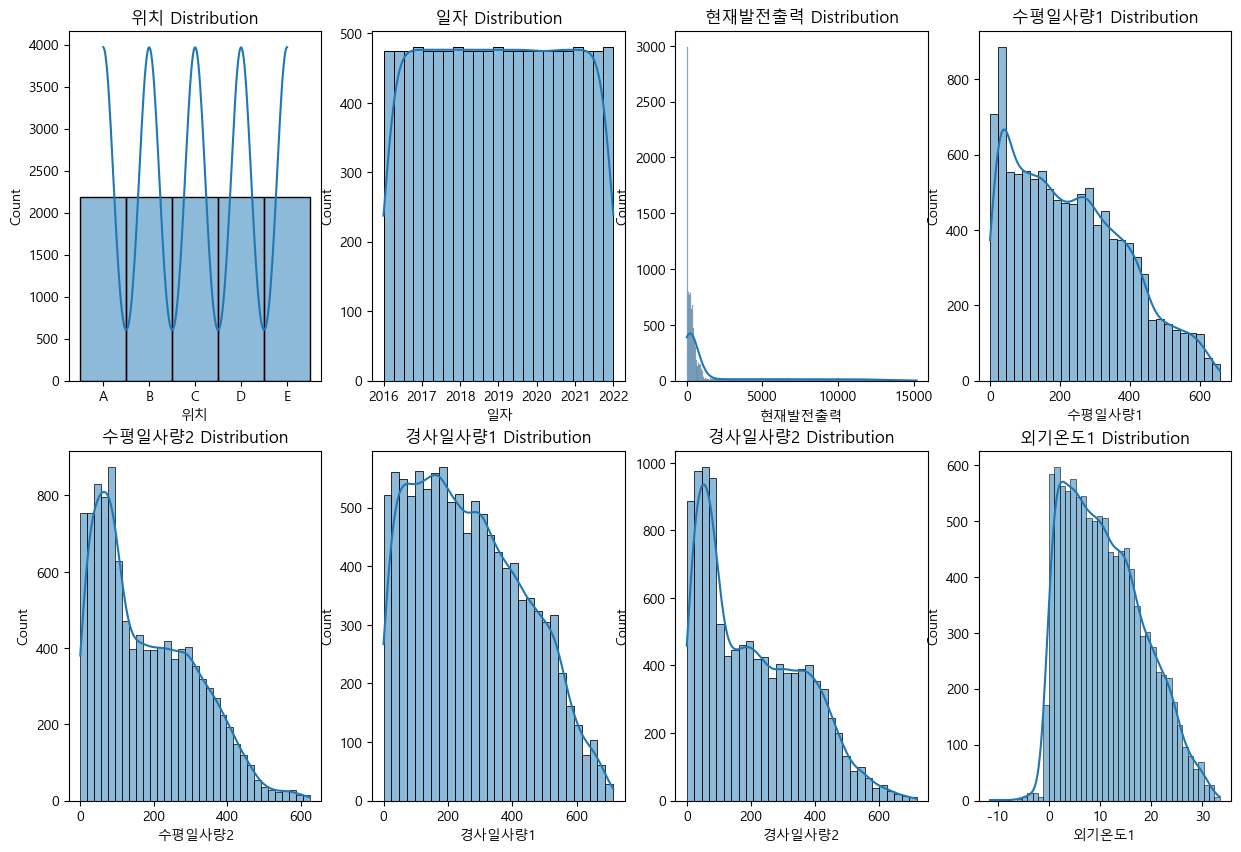

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분포 시각화
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

# 이상치 확인
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

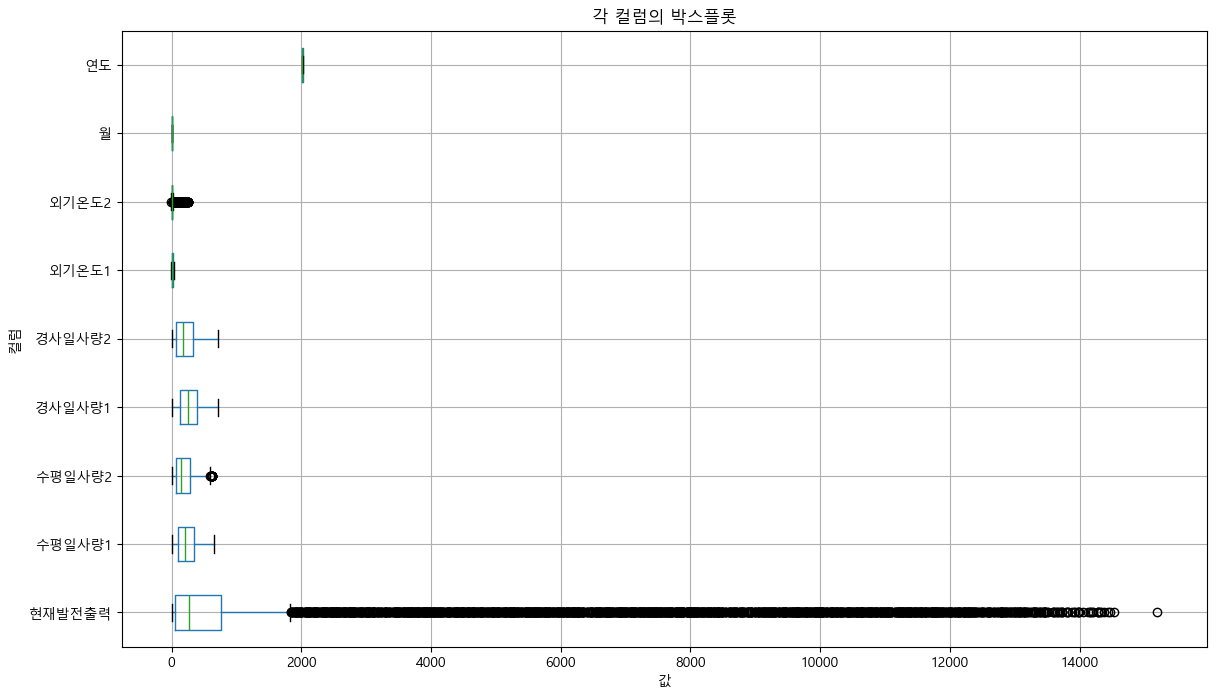

In [54]:
# 박스플롯 그리기
plt.figure(figsize=(14, 8))
df.boxplot(grid=True, vert=False)
plt.title('각 컬럼의 박스플롯')
plt.xlabel('값')
plt.ylabel('컬럼')
plt.show()

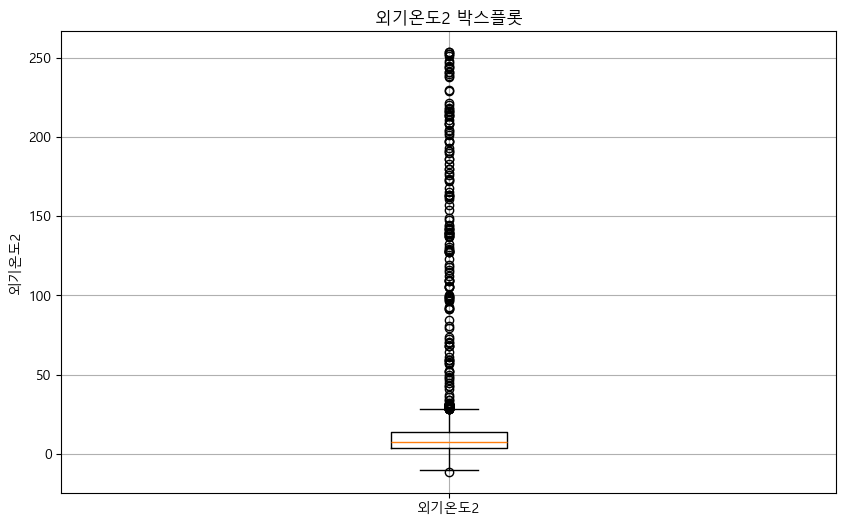

In [60]:
# 외기온도2의 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(df['외기온도2'])
plt.title('외기온도2 박스플롯')
plt.ylabel('외기온도2')
plt.xticks([1], ['외기온도2'])  # x축 레이블 추가
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

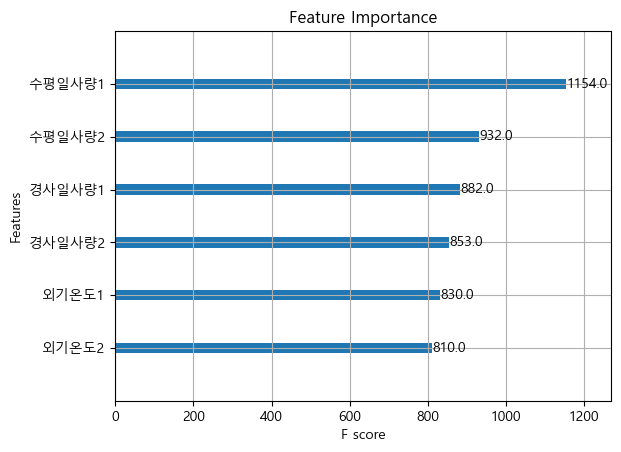

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

# 특징과 라벨 설정
X = df[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2']]
y = df['현재발전출력']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# XGBoost 모델 훈련
model = XGBRegressor(random_state=0)
model.fit(X_train, y_train)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.show()

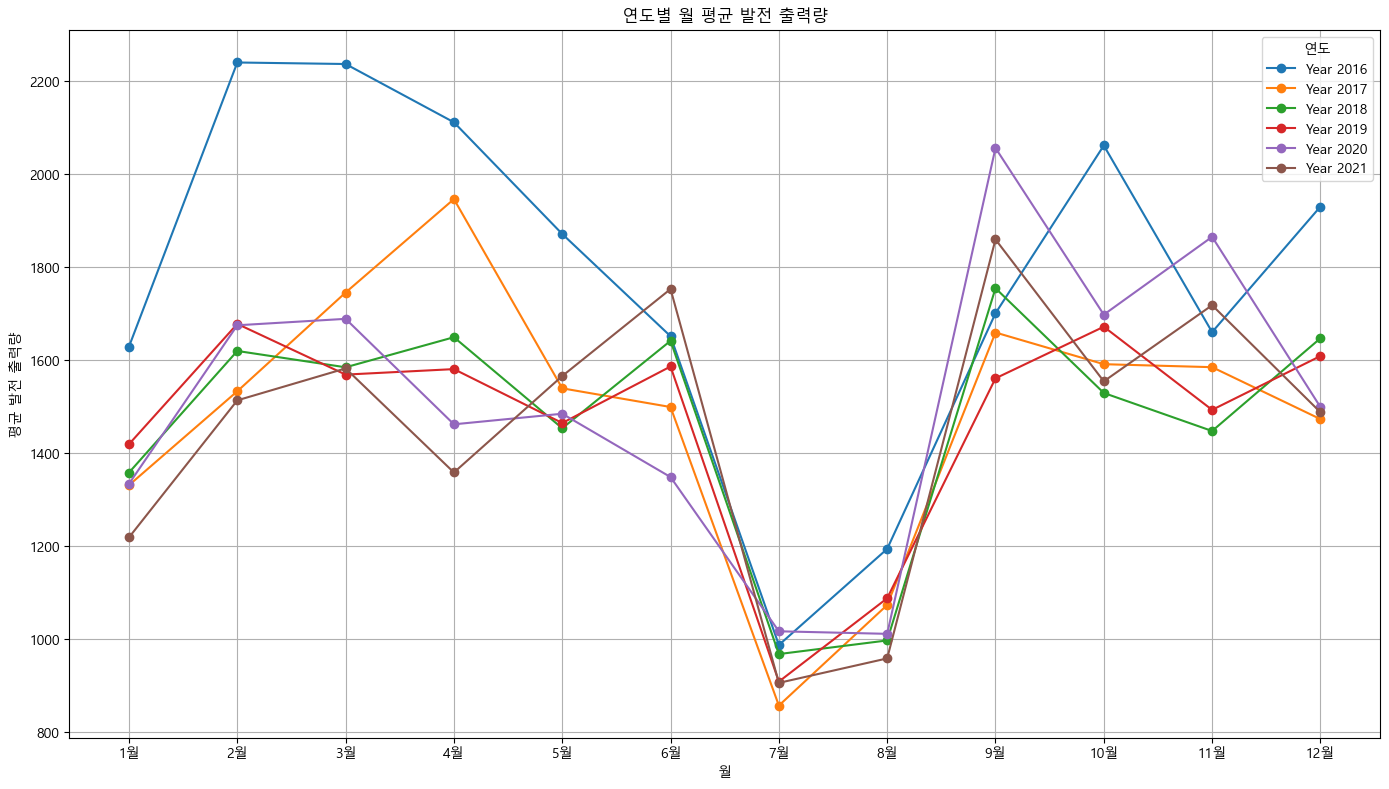

In [34]:
# 연도와 월 추출
df['연도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month

# 연도와 월별로 평균 발전 출력량 계산
monthly_avg_by_year = df.groupby(['연도', '월'])['현재발전출력'].mean().unstack()

# 시각화
plt.figure(figsize=(14, 8))
for year in monthly_avg_by_year.index:
    plt.plot(monthly_avg_by_year.columns, monthly_avg_by_year.loc[year], marker='o', linestyle='-', label=f'Year {year}')

plt.title('연도별 월 평균 발전 출력량')
plt.xlabel('월')
plt.ylabel('평균 발전 출력량')
plt.legend(title='연도')
plt.grid(True)
plt.xticks(
    ticks=range(1, 13),
    labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
)
plt.tight_layout()
plt.show()

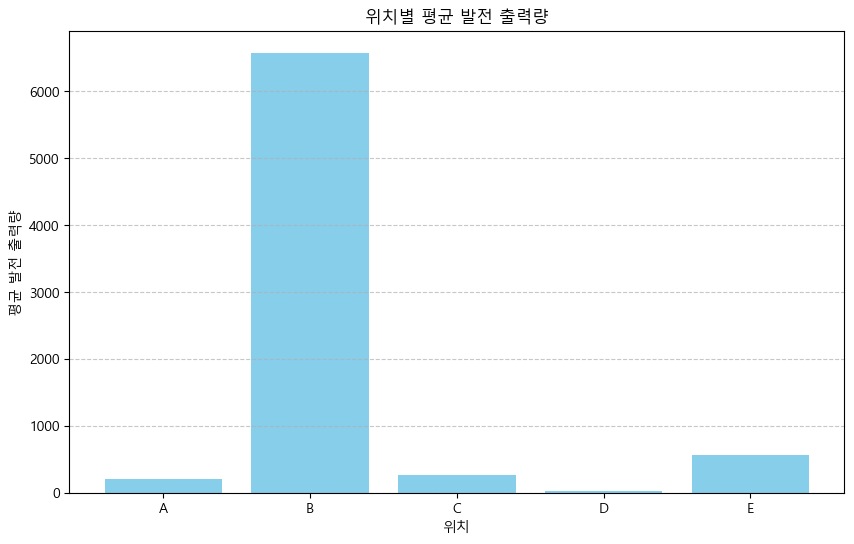

In [36]:
# 위치별 현재 발전 출력량의 평균 계산
location_avg = df.groupby('위치')['현재발전출력'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(location_avg.index, location_avg.values, color='skyblue')
plt.xlabel('위치')
plt.ylabel('평균 발전 출력량')
plt.title('위치별 평균 발전 출력량')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# B가 발전출력량이 많이 나오는데 그냥 태양광 기기가 많아서 이렇게 나오는거라함

In [38]:
df['위치'].value_counts()

위치
D    2190
E    2190
C    2190
B    2190
A    2190
Name: count, dtype: int64

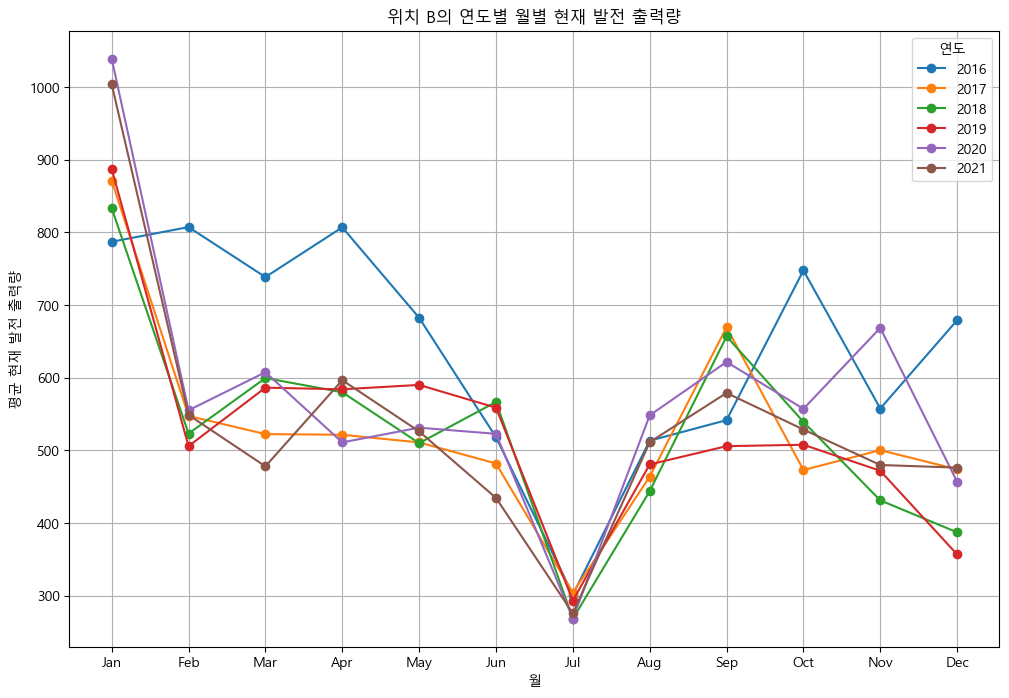

In [50]:
# 위치 B의 데이터 필터링
df_b = df[df['위치'] == 'E']

# 연도와 월 추출
df_b['연도'] = df_b['일자'].dt.year
df_b['월'] = df_b['일자'].dt.month

# 연도별 월별 현재 발전 출력량 집계
monthly_output = df_b.groupby(['연도', '월'])['현재발전출력'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for year in monthly_output.index:
    plt.plot(monthly_output.columns, monthly_output.loc[year], marker='o', label=f'{year}')

plt.xlabel('월')
plt.ylabel('평균 현재 발전 출력량')
plt.title('위치 B의 연도별 월별 현재 발전 출력량')
plt.legend(title='연도')
plt.grid(True)
plt.xticks(ticks=monthly_output.columns, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

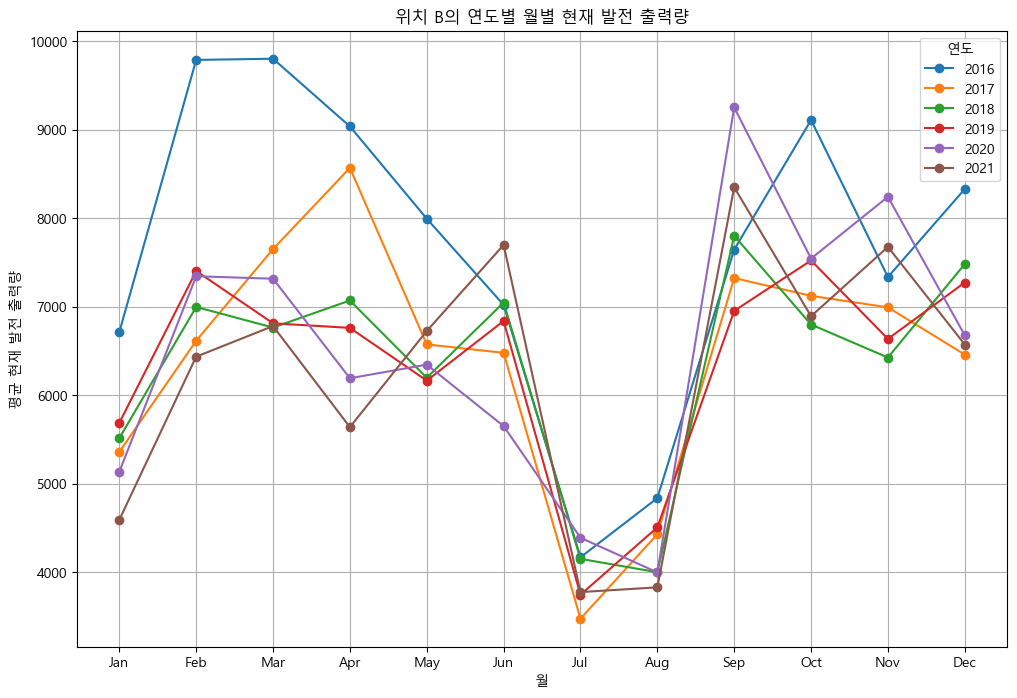

In [44]:
# 위치 B의 데이터 필터링
df_b = df[df['위치'] == 'B']

# 연도와 월 추출
df_b['연도'] = df_b['일자'].dt.year
df_b['월'] = df_b['일자'].dt.month

# 연도별 월별 현재 발전 출력량 집계
monthly_output = df_b.groupby(['연도', '월'])['현재발전출력'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
for year in monthly_output.index:
    plt.plot(monthly_output.columns, monthly_output.loc[year], marker='o', label=f'{year}')

plt.xlabel('월')
plt.ylabel('평균 현재 발전 출력량')
plt.title('위치 B의 연도별 월별 현재 발전 출력량')
plt.legend(title='연도')
plt.grid(True)
plt.xticks(ticks=monthly_output.columns, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### 위치 : 당진(A,B) 울산-영덕(C), 호남-영광(D), 동해(E)